In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import rcParams

In [47]:
full_data = pd.read_csv("load_prediction_data.csv", parse_dates=["start_time"])
full_data.head(1)

,start_time,trip_amount,start_hour,start_day,start_month,start_weekday,is_weekend,mean_duration_min,max_temp,precip
0,2017-01-01,4,0,1,1,6,1,9.5,-0.6,0.0


In [53]:
X_full = full_data[["start_hour","start_month","start_weekday","is_weekend"]]
y_full = full_data["trip_amount"]

# train-test split (30% test 49% train 21% validation)
X_temp, X_test, y_temp, y_test = train_test_split(X_full, y_full, test_size= 0.3, random_state= 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size= 0.3, random_state= 42)

def poly_features(X, d):
    poly_feat = PolynomialFeatures (degree = d)
    x_poly = poly_feat.fit_transform(X)
    return x_poly

def poly_regression(X, y, d):
    poly_reg = LinearRegression()
    poly_reg.fit(poly_features(X, d), y)
    return poly_reg

def evaluate(y_true, y_pred):
    print("MSE: " + mean_squared_error(y_true, y_pred))
    print("MAE: " + mean_absolute_error(y_true, y_pred))
    print("R^2: " + r2_score(y_true, y_pred))

# test poly prediction with degree = 8
model = poly_regression(X_train, y_train, 8)

y_model = model.predict(poly_features(X_valid, 8))

evaluate(y_valid, y_model)


603.7904681409343
17.19855254612245
0.7544659793162583


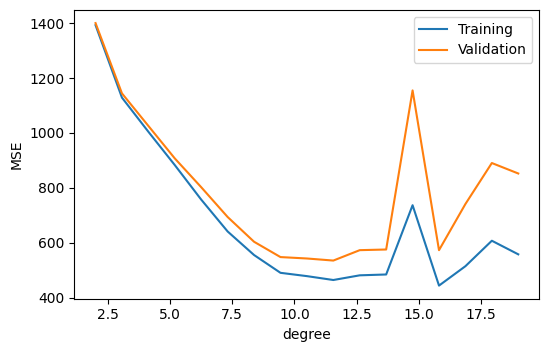

In [54]:
# tune hyperparameter d
performance_train_set = list()
performance_valid_set = list()

min_degree = 2
max_degree = 18 # can take a long time for high numbers (5min for 18)
eval_function = mean_squared_error

for d in range(min_degree, max_degree + 1):
    model = poly_regression(X_train, y_train, d)
    
    y_model = model.predict(poly_features(X_train, d))
    performance_train_set.append(eval_function(y_train, y_model))

    y_model = model.predict(poly_features(X_valid, d))
    performance_valid_set.append(eval_function(y_valid, y_model))

rcParams['figure.figsize'] = 6, 3.75
plt.plot(np.linspace(min_degree, max_degree+1, max_degree + 1 - min_degree), performance_train_set)
plt.plot(np.linspace(min_degree, max_degree+1, max_degree + 1 - min_degree), performance_valid_set)

plt.legend(["Training", "Validation"])
plt.xlabel("degree")
plt.ylabel("MSE")
plt.show()